## <span style="color:rgb(25,25,112)">Import des bibliotheques</span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
%matplotlib inline

## <span style="color:rgb(25,25,112)">Import du fichier CSV</span>


In [2]:
df = pd.read_csv('music_genre.csv', header=0)

**Premières 5 lignes de notre DataFrame**

In [3]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


**Info sur les colonnes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

**Obtenir des statistiques de base sur les données <span style="color:red">numériques</span> :**

In [5]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


**Obtenir des statistiques de base sur les données <span style="color:red">qualitatives</span> :**

In [6]:
df.describe(include = object)

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,50000,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,5,10
top,empty_field,Home,G,Major,?,4-Apr,Electronic
freq,2489,16,5727,32099,4980,44748,5000


> Les valeurs `empty_field` et `?` dans le dataset sont traitées comme des chaînes valides au lieu de valeurs manquantes, nécessitant leur conversion en `NaN` pour une gestion correcte.

## <span style="color:rgb(25,25,112)">Préparation de données</span>


**Compte du nombre de valeurs manquantes par colonne (<span style="color:green">avant</span> remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>)**

In [7]:
df.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

**Remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>**

In [8]:
df.replace(['empty_field', '?'], np.nan, inplace=True)

**Compte du nombre de valeurs manquantes par colonne (<span style="color:green">après</span> remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>)**

In [9]:
df.isnull().sum()

instance_id            5
artist_name         2494
track_name             5
popularity             5
acousticness           5
danceability           5
duration_ms            5
energy                 5
instrumentalness       5
key                    5
liveness               5
loudness               5
mode                   5
speechiness            5
tempo               4985
obtained_date          5
valence                5
music_genre            5
dtype: int64

**Remplacement sur les données <span style="color:red">numériques</span> :**

In [10]:
# Création d'un impute pour remplacer les valeurs manquantes des colonnes numériques
imputer_num = SimpleImputer(strategy="median")

# Sélection
numerical_cols = df.select_dtypes(include=['float64']).columns

# Application de l'impute sur les colonnes numériques
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])


**Remplacement sur les données <span style="color:red">qualitatives/catégoriels</span> :**

In [11]:
# Création d'un impute pour les attributs catégoriels
imputer_cat = SimpleImputer(strategy="most_frequent")

# Sélection
categorical_cols = df.select_dtypes(include=['object']).columns

# Application de l'impute sur les colonnes catégorielles
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


**Supprimer `music_genre`, pour que le modèle ne soit pas influencé par cette colonne**

In [12]:
# Supprimer la colonne 'music_genre' et la stocker dans une variable séparée
labels = df['music_genre'].copy()
df = df.drop('music_genre', axis=1)


**Suppression des Colonnes Inutiles**


In [13]:
df.drop(['artist_name', 'track_name', 'obtained_date'], axis=1, inplace=True)

**Convertir tempo en Type Numérique**

In [14]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')

>La colonne `tempo` contient des valeurs numériques, mais elle est stockée en tant que type objet,

**Encodage des Données Catégorielles**

In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,32894.0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,...,0,0,0,0,0,0,0,0,0,1
1,46652.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,...,0,0,1,0,0,0,0,0,0,1
2,30097.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,...,0,0,0,0,0,0,0,0,1,0
3,62177.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,...,0,1,0,0,0,0,0,0,0,0
4,24907.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,...,0,0,0,0,0,0,1,0,0,0


> l'encodage One-Hot créera une nouvelle colonne pour chaque catégorie unique des données catégorielles, avec des 1 et des 0 indiquant la présence d'une catégorie pour chaque observation 

**Standardisation des données numériques**

In [16]:
# Création d'un objet StandardScaler
scaler = StandardScaler()

# Application de la standardisation aux caractéristiques numériques
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.drop(['instance_id'], axis=1, inplace=True)

>La standardisation des données numériques assure que chaque caractéristique contribue équitablement au modèle, évitant ainsi que les variables à grande échelle dominent indûment le processus d'analyse.

## <span style="color:rgb(25,25,112)">Classification Hiérarchique</span>

**Création d'un sous-ensemble de données**

In [17]:
# Sous-ensemble aléatoire de 3500 instances
df_sample = df.sample(n=3500, random_state=42)

**Dendrogramme**

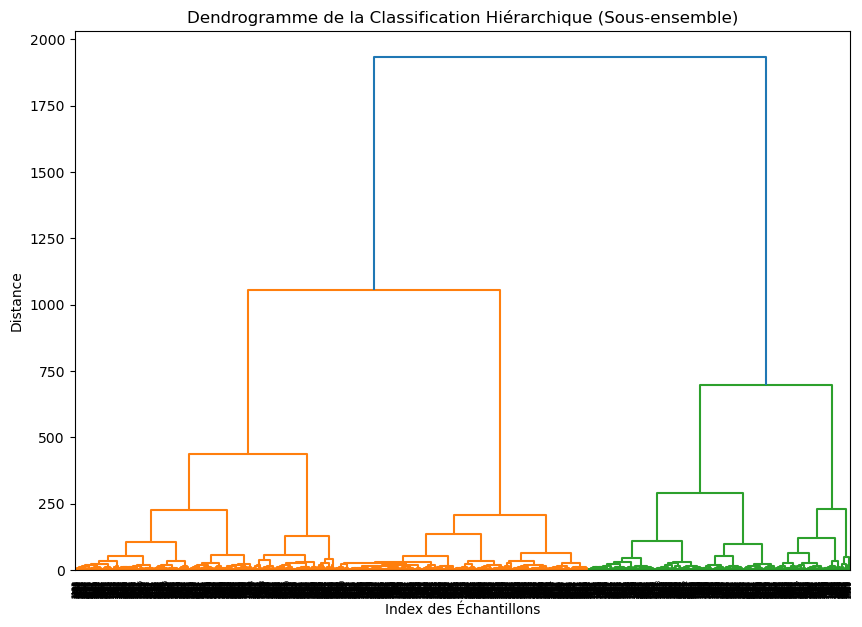

In [18]:
# Classification hiérarchique sur ce sous-ensemble
linked_sample = linkage(df_sample, method='ward')

# Affichage du dendrogramme pour le sous-ensemble
plt.figure(figsize=(10, 7))
dendrogram(linked_sample, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogramme de la Classification Hiérarchique (Sous-ensemble)')
plt.xlabel('Index des Échantillons')
plt.ylabel('Distance')
plt.show()


>Pour gérer la complexité computationnelle de la classification hiérarchique sur notre large dataset (50 005 lignes), nous avons sélectionné un échantillon représentatif de 3500 lignes. Cette approche permet une analyse plus rapide et plus efficace tout en conservant les caractéristiques essentielles de la distribution des données.

**Interpretation dendrogramme**

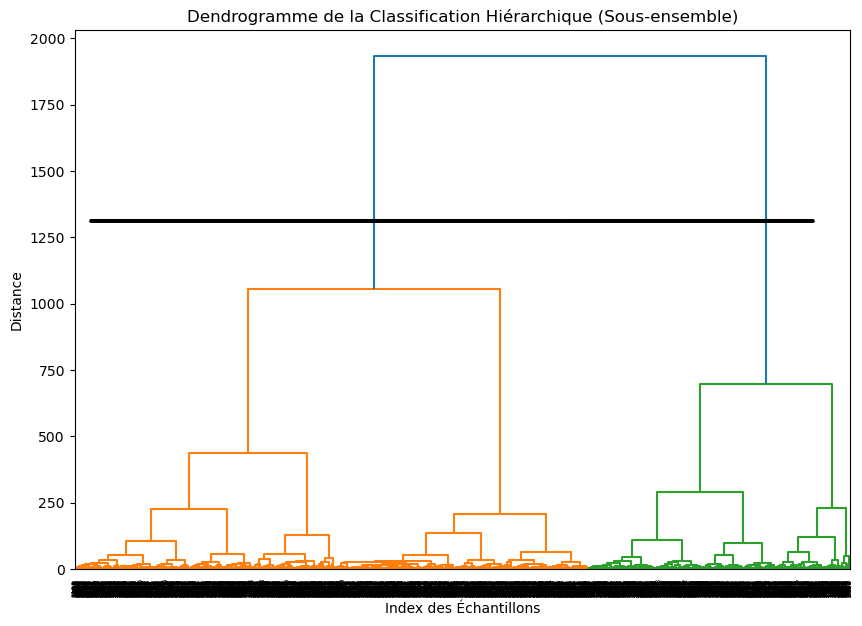

>Le dendrogramme suggère que quatre clusters fournissent une séparation claire et significative des données, avec des distances de fusion montrant des distinctions nettes entre les groupes. 

 **Classification hiérarchique agglomérative**

In [19]:
from sklearn.cluster import AgglomerativeClustering

# Créer une instance avec le nombre de clusters déterminé
agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Ajuster le modèle aux données et prédire les clusters
cluster_labels = agg_cluster.fit_predict(df_sample)

# Ajouter les étiquettes de cluster au DataFrame pour analyse
df_sample['Cluster_Hierarch'] = cluster_labels

print("Terminé")

Terminé


**Score moyen de silhouette**

In [20]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_sample.drop(['Cluster_Hierarch'], axis=1), df_sample['Cluster_Hierarch'])
print(f"Le score moyen de silhouette pour les clusters hiérarchiques est : {silhouette_avg}")


Le score moyen de silhouette pour les clusters hiérarchiques est : 0.5357915728833219


<ul>
    <li style="color:green">k=2 : 0.5357915728833219</li>
    <li>k=3 : 0.5004733012021704</li>
    <li>k=4 : 0.5277215709621763</li>
    <li>k=5 : 0.5001639225136983</li>
    <li>k=6 : 0.459685059058181</li>
    <li>k=7 : 0.4651547060646202</li>
</ul>

>Nous avons opté pour quatre clusters car le dendrogramme indiquait clairement cette segmentation et les scores de silhouette étaient comparativement élevés et proches les uns des autres, ce qui suggère que le choix de quatre ne compromet pas significativement la qualité du clustering.

## <span style="color:rgb(25,25,112)">Spectral clustering</span>

**Étape 1: Création d'un sous-ensemble de données**

In [21]:
# Sous-ensemble aléatoire de 10000 instances
df_sample = df.sample(n=3500, random_state=42)

**Étape 2: Construction de la Matrice d'Affinité**

In [22]:
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import kneighbors_graph

affinity_matrix = kneighbors_graph(df_sample, n_neighbors=10, include_self=True, mode='connectivity', n_jobs=-1)



D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


**Étape 3: Choix du Nombre de Clusters**

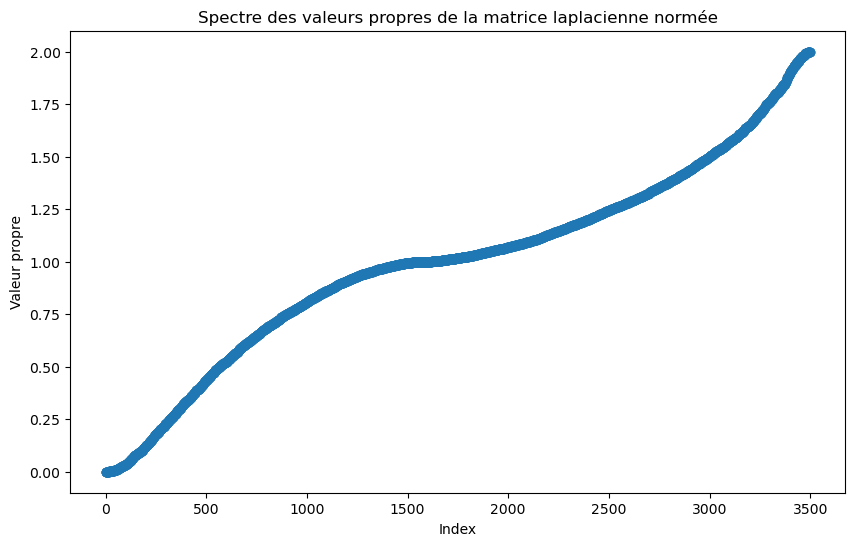

In [23]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import rbf_kernel
from scipy.sparse.csgraph import laplacian
from scipy.linalg import eigh

# Calcul de la matrice d'affinité, vous pouvez ajuster gamma en fonction de vos données
affinity_matrix = rbf_kernel(df_sample, gamma=1.0)

# Calcul de la matrice laplacienne
laplacian_matrix = laplacian(affinity_matrix, normed=True)

# Calcul des valeurs propres triées de la matrice laplacienne
eigenvalues, _ = eigh(laplacian_matrix, subset_by_index=[0, df_sample.shape[0]-1])

# Afficher les valeurs propres triées pour décider du nombre de clusters
sorted_eigenvalues = np.sort(eigenvalues)

# Tracer les valeurs propres pour visualiser le "eigengap"
plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, 'o')
plt.title("Spectre des valeurs propres de la matrice laplacienne normée")
plt.xlabel("Index")
plt.ylabel("Valeur propre")
plt.show()


>D'après la courbe des valeurs propres de la matrice laplacienne, le choix du nombre de clusters n'est pas immédiatement évident car il n'y a pas de "eigengap" marqué ou de point où un grand saut dans les valeurs propres est visible. 

**Étape 4: Application du Spectral Clustering**

In [24]:
# Application de Spectral Clustering
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
clusters_labels = sc.fit_predict(df_sample)


**Étape 5: Évaluation avec le Score de Silhouette**

In [25]:
from sklearn.metrics import silhouette_score

# Calcul du score de silhouette
silhouette_avg = silhouette_score(df_sample, clusters_labels)
print(f"Le score moyen de silhouette est : {silhouette_avg}")


Le score moyen de silhouette est : 0.5330866828604722


<ul>
    <li>k=2  : 0.5330866828604722</li>
    <li style="color:green">k=3  : 0.5490352431493932</li>
    <li>k=4  : 0.5223491023792821</li>
    <li>k=5  : 0.5047728852899933</li>
    <li>k=10 : 0.3943479401313549</li>
</ul>


**Visualisation**

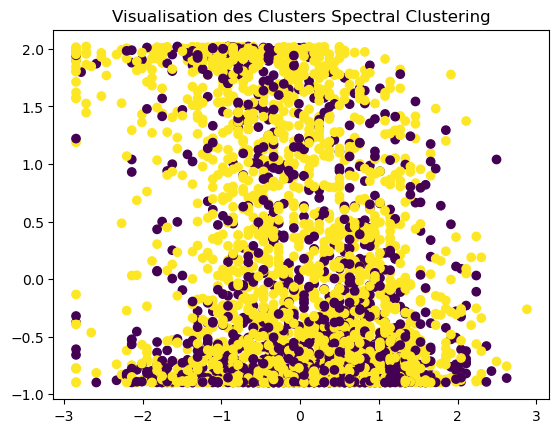

In [26]:
import matplotlib.pyplot as plt

# Affichage des points avec une couleur par cluster
plt.scatter(df_sample.iloc[:, 0], df_sample.iloc[:, 1], c=clusters_labels, cmap='viridis')
plt.title("Visualisation des Clusters Spectral Clustering")
plt.show()


<h1 style="color:rgb(25,25,112)">Analyse des Scores de Silhouette pour les Méthodes de Clustering</h1>
<h2>K-Means Clustering</h2>
<ul>
    <li>k=2 : 0.5251</li>
    <li>k=3 : 0.5541</li>
    <li>k=4 : 0.5234</li>
    <li>k=5 : 0.5048</li>
    <li>k=10 : 0.4031</li>
</ul>
<h2>Clustering Hiérarchique</h2>
<ul>
    <li>k=2 : 0.5358</li>
    <li>k=3 : 0.5005</li>
    <li>k=4 : 0.5277</li>
    <li>k=5 : 0.5002</li>
    <li>k=6 : 0.4597</li>
    <li>k=7 : 0.4652</li>
</ul>
<h2>Spectral Clustering</h2>
<ul>
    <li>k=2 : 0.5331</li>
    <li>k=3 : 0.5490</li>
    <li>k=4 : 0.5223</li>
    <li>k=5 : 0.5048</li>
    <li>k=10 : 0.3943</li>
</ul>
<h2>Interprétation</h2>
<p>
    Les scores de silhouette indiquent que pour le K-Means et le Clustering Hiérarchique, le meilleur regroupement est obtenu avec <strong>k=3 clusters</strong>, ce qui suggère une structure de données qui peut être divisée naturellement en trois groupes distincts. Pour le Spectral Clustering, malgré un score de silhouette comparable pour k=3, la visualisation des clusters ne montre pas une séparation claire, ce qui peut indiquer une distribution plus complexe des données ou une inadéquation du modèle aux spécificités du dataset.
</p>
<p>
    Ces résultats soulignent l'importance de considérer à la fois les mesures quantitatives, comme le score de silhouette, et les observations qualitatives, telles que les visualisations des données, pour évaluer la qualité du clustering.
</p>

